In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam, Adadelta, Adamax,Nadam
from keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler,minmax_scale,normalize
import timeit
from numpy import mean
from numpy import std
from numpy import dstack
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
start = timeit.default_timer()
dataframe = pd.read_csv('/content/drive/MyDrive/Research/Deep Learning/LaminatedPlate_RZT_Q9.csv')
dataset = dataframe.values
data = dataset[:,0:55]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
start = timeit.default_timer()
nb_set = 50000
nb_test=int(nb_set*0.8)

x_train = data[:nb_test,0:50]
x_test  = data[nb_test:,0:50]

y_train = data[:nb_test,50:55]
y_test  = data[nb_test:,50:55]
#reshpae input data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
# print('x_train_shape',x_train.shape)

input_node  = x_train.shape[1]
output_node = y_train.shape[1]
n_timesteps = x_train.shape[2]
print("inputnode",input_node)
print("inputnode",output_node)

inputnode 50
inputnode 5


In [ ]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh', input_shape=(input_node,n_timesteps)))
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh'))
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(200, activation='tanh'))
model.add(Dense(200, activation='tanh'))
model.add(Dense(output_node,activation='tanh'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 48, 128)           512       
                                                                 
 conv1d_10 (Conv1D)          (None, 46, 128)           49280     
                                                                 
 conv1d_11 (Conv1D)          (None, 44, 128)           49280     
                                                                 
 dropout_3 (Dropout)         (None, 44, 128)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 22, 128)          0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2816)              0         
                                                      

In [ ]:
json_string = model.to_json()
open('/content/drive/MyDrive/CNN1D/modelCon1D.json', 'w').write(json_string)

3728

In [ ]:
#optimizers
adam = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
rms = RMSprop(learning_rate = 0.01, rho=0.9, epsilon=1e-08)
ada = Adagrad(learning_rate=0.2, epsilon=1e-08)
sgd = SGD(learning_rate=0.1, momentum=0.1)
adadel=Adadelta(learning_rate=1.0, rho=0.95, epsilon=1e-08)
adamax = Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
nadam = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
from keras.callbacks import CSVLogger
# fit network
csv_logger = CSVLogger('/content/drive/MyDrive/CNN1D/Adam_relu/training_history_t.csv')
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test),batch_size=256, verbose=1,callbacks=[csv_logger])
scores = model.evaluate(x_test, y_test,verbose=0)

Epoch 1/1000
157/157 [==============================] - 2s 10ms/step - loss: 0.0855 - accuracy: 0.1992 - val_loss: 0.0134 - val_accuracy: 0.3877
Epoch 2/1000
157/157 [==============================] - 1s 8ms/step - loss: 0.0135 - accuracy: 0.3652 - val_loss: 0.0138 - val_accuracy: 0.3877
Epoch 3/1000
157/157 [==============================] - 1s 9ms/step - loss: 0.0136 - accuracy: 0.3616 - val_loss: 0.0134 - val_accuracy: 0.3877
Epoch 4/1000
157/157 [==============================] - 1s 8ms/step - loss: 0.0136 - accuracy: 0.3548 - val_loss: 0.0146 - val_accuracy: 0.3102
Epoch 5/1000
157/157 [==============================] - 2s 11ms/step - loss: 0.0136 - accuracy: 0.3580 - val_loss: 0.0134 - val_accuracy: 0.3877
Epoch 6/1000
157/157 [==============================] - 2s 10ms/step - loss: 0.0137 - accuracy: 0.3583 - val_loss: 0.0136 - val_accuracy: 0.3102
Epoch 7/1000
157/157 [==============================] - 1s 9ms/step - loss: 0.0136 - accuracy: 0.3642 - val_loss: 0.0134 - val_accura

In [ ]:
model.save_weights('/content/drive/MyDrive/CNN1D/Adam_relu/target_weight_t.h1', overwrite=True)
print(model.evaluate(x_train, y_train))

1250/1250 [==============================] - 4s 3ms/step - loss: 8.5202e-04 - accuracy: 0.7677
[0.0008520219125784934, 0.7677249908447266]


In [ ]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
mse_train = mean_squared_error(pred_train, y_train)
mse_test  = mean_squared_error(pred_test, y_test)
mae_train = mean_absolute_error(pred_train, y_train)
mae_test = mean_absolute_error(pred_test,  y_test)

In [ ]:
stop = timeit.default_timer()
with open("/content/drive/MyDrive/CNN1D/Adam_relu/MSE_Computingtime_t.txt", "w") as text_file:
    print("Computing time: "+str(stop - start), file=text_file)
    print('MSE for train: ' +str(mse_train),file=text_file)
    print('MSE for test: '  + str(mse_test), file=text_file)
    print('mean absolute error for train: '+str(mae_train),file=text_file)
    print('mean absolute error for test: ' + str(mae_test), file=text_file)
    print('scores: ' +str(scores),file=text_file)
    print("%s:%.2f%%" % (model.metrics_names[1], scores[1] * 100),file=text_file)


print('Computing time:',stop - start)
print('mean square error for train and test',mse_train, mse_test)
print('scores ',scores)
print("%s:%.2f%%"%(model.metrics_names[1],scores[1]*100))

Computing time: 1495.6468440680005
mean square error for train and test 0.0008520226923337077 0.0013838125088035432
scores  [0.001383812865242362, 0.739874005317688]
accuracy:73.99%


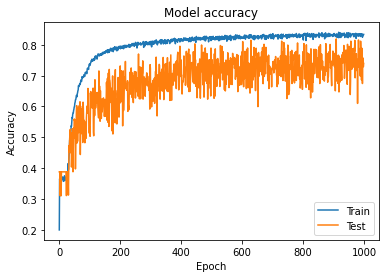

In [ ]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

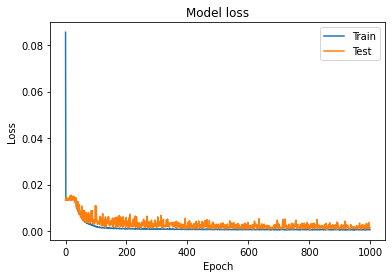

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
#model.summary()
#config = model.get_config()
#model.get_weights()
#print('config',config)
#print(ascii(model))